In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import io
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://raw.githubusercontent.com/e-k-a/RedWineQuality/main/Red_Wine_Quality/winequality-red.csv"

In [3]:
dataset = pd.read_csv(url)

In [4]:
dataset1 = pd.read_csv('winequality-red.csv')

In [5]:
print("Размер выборки составляет ", dataset.shape[0], "объектов и", dataset.shape[1],"признаков")

Размер выборки составляет  1599 объектов и 12 признаков


Рассмотрим эти признаки:

1 - fixed acidity - параметр указывает на количество кислотности (винная, яблочная и янтарная) в вине.

2 - volatile acidity -  параметр относится к присутствующим в вине кислотам, перегоняемым с водяным паром.

3 - citric acid -  параметр указывает на содержание лимонной кислоты. 

4 - residual sugar -параметр показывает количество углеводов, которое осталось после завершения процесса брожения

5 - chlorides -параметр указывает на содержание соли в вине.

6 - free sulfur dioxide - параметр показывает количество диоксида серы, который влияет на противогрибковые свойства.

7 - total sulfur dioxide - Параметр указывает на общее количество диоксида серы

8 - density - параметр определяет плотность вина. Плотность вина зависит от содержания в нем спирта, остаточного сахара, глицерина.

9 - pH - параметр описывает уровень кислотности по шкале от 0 до 14.

10 - sulphates - параметр описывает добавку, которая усиливает действия диоксида серы. 

11 - alcohol - параметр указывает содержания алкоголя в вине.

12 - quality  - сама оценка

In [6]:
dataset.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Представим краткую информацию о доступных данных:
Всего чуть меньше 1600 данных, из них все поля заполнены, нет пропуска данных, но есть повторяющиеся, их удалять не будем, считая что дегустаторы дали одинаковые оценки различным видам вина. 

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Рассмотрим сами оценки. Они не являются сбалансированными. Выделяется большее количество с оценками 5-6. Оценок выше 8 не представлено вовсе, что может указывать, что идеального вино дегустаторы не попробовали. 

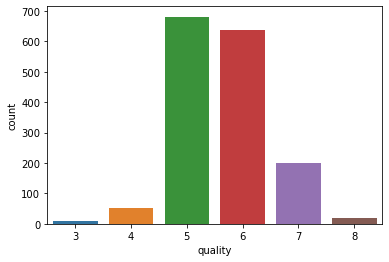

In [9]:
sns.countplot(x='quality', data=dataset)
plt.savefig('foo.png', bbox_inches='tight')

In [10]:
dataset.duplicated().sum()

240

Посмотрим, как распределены данные. fixed acidity, residual sugar, density, pH  несильно влияют на качество вина. 
volatile acidity, chlorides видно, что при снижении этих параметров качество увеличивается. Наоборот происходит с citric acid, sulphates, alcohol - при увеличении параметров увеличивается и качество.


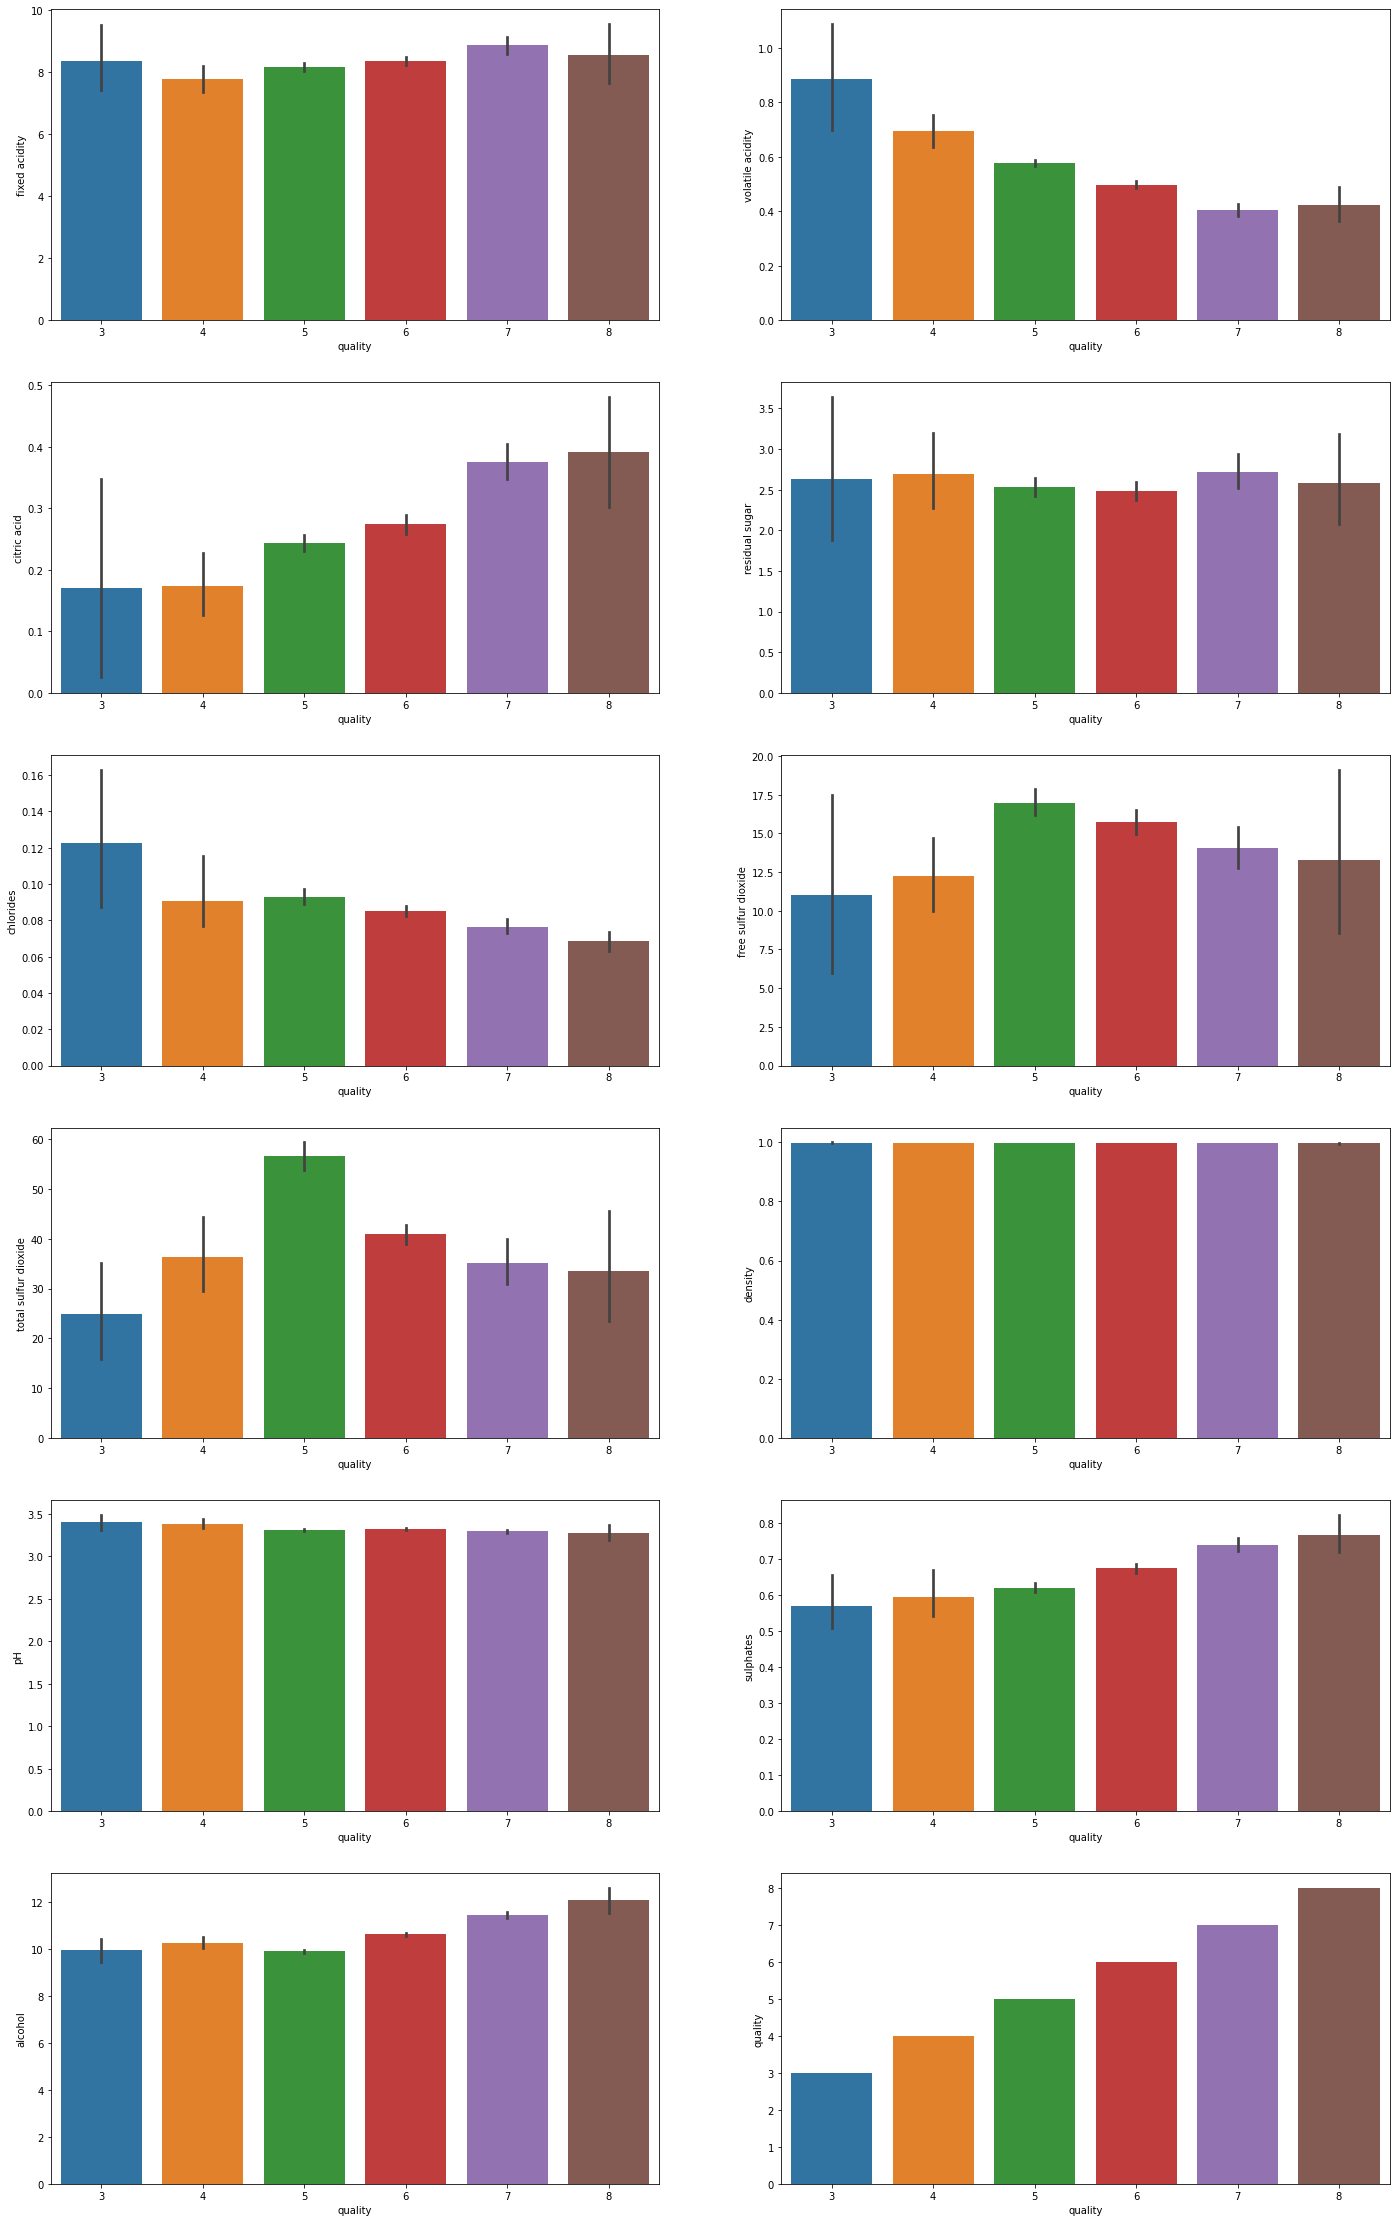

In [11]:
fig, ax1 = plt.subplots(6,2, figsize=(24,40))
k = 0
columns = list(dataset.columns)
for i in range(6):
    for j in range(2):
            sns.barplot(dataset['quality'], dataset[columns[k]], ax = ax1[i][j])
            plt.savefig('foo1.png', bbox_inches='tight')
            k += 1
plt.show()

Рассмотрим тепловую матрицу. Наибольшая корреляция между параметромкислотности и параметромлимонной кислотой, кислотностью и плотностью вина и между диоксидами. Так что можно сделать вывод, что для определения качества вина нужны почти все параметры. 

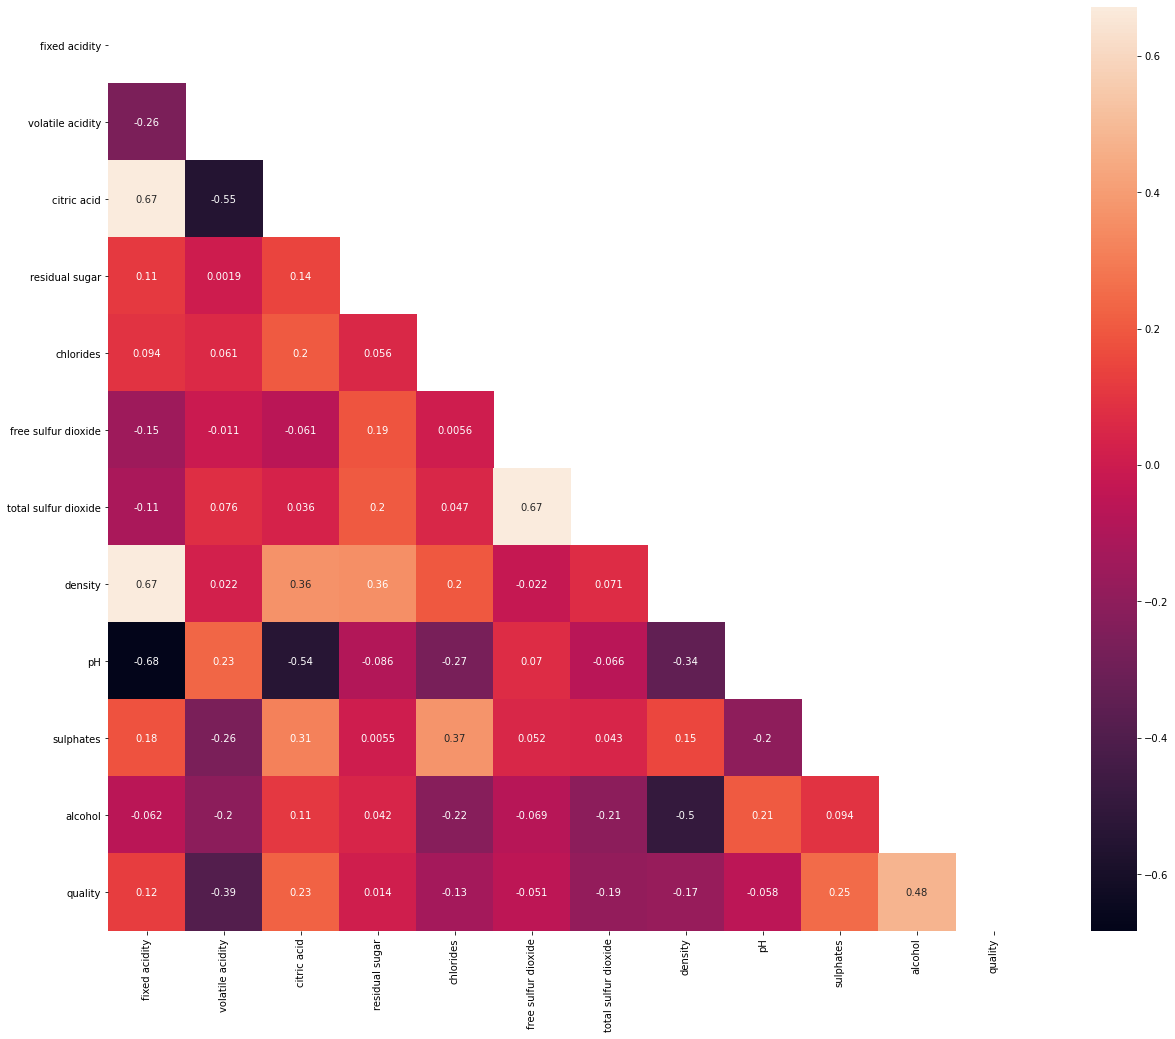

In [12]:
matrix = np.triu(dataset.corr())
plt.subplots(figsize=(21, 17))
sns.heatmap(dataset.corr(), square = True,annot=True, mask=matrix);
plt.savefig('foo2.png', bbox_inches='tight')

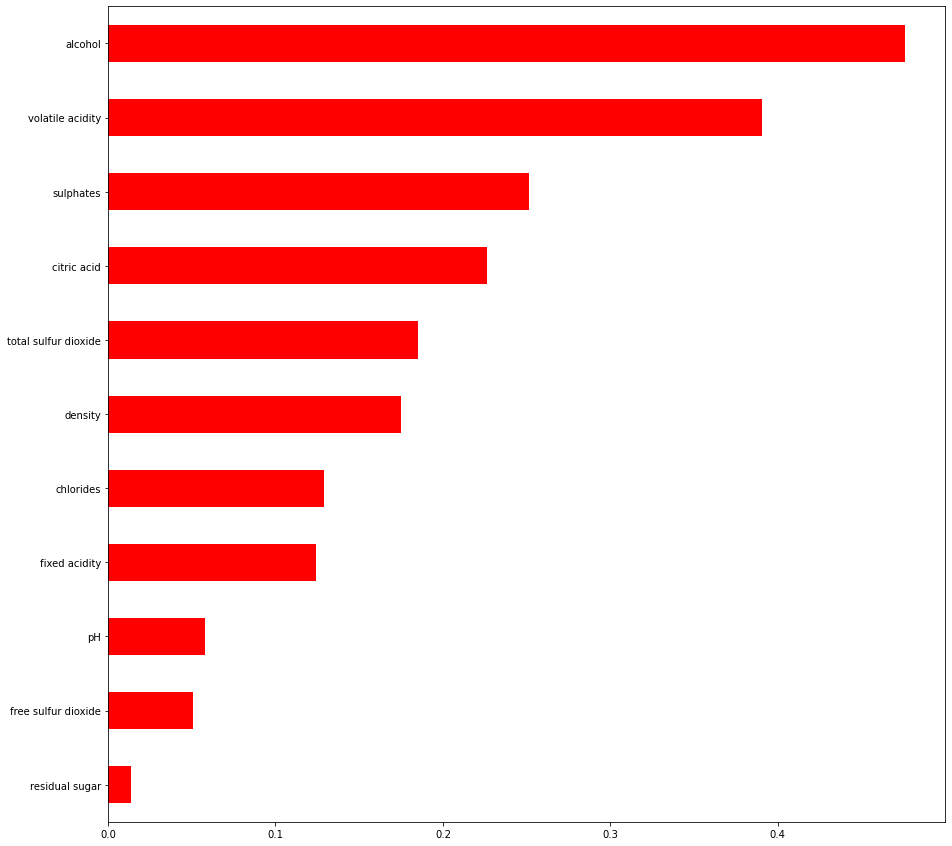

In [13]:
plt.figure(figsize=(15,15))
dataset.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1::][::-1].plot(kind='barh', color = 'red') 
plt.savefig('foo3.png', bbox_inches='tight')

In [14]:
dataset.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Теперь рассмотрим выбросы. Почти все они содержат выбросы. 

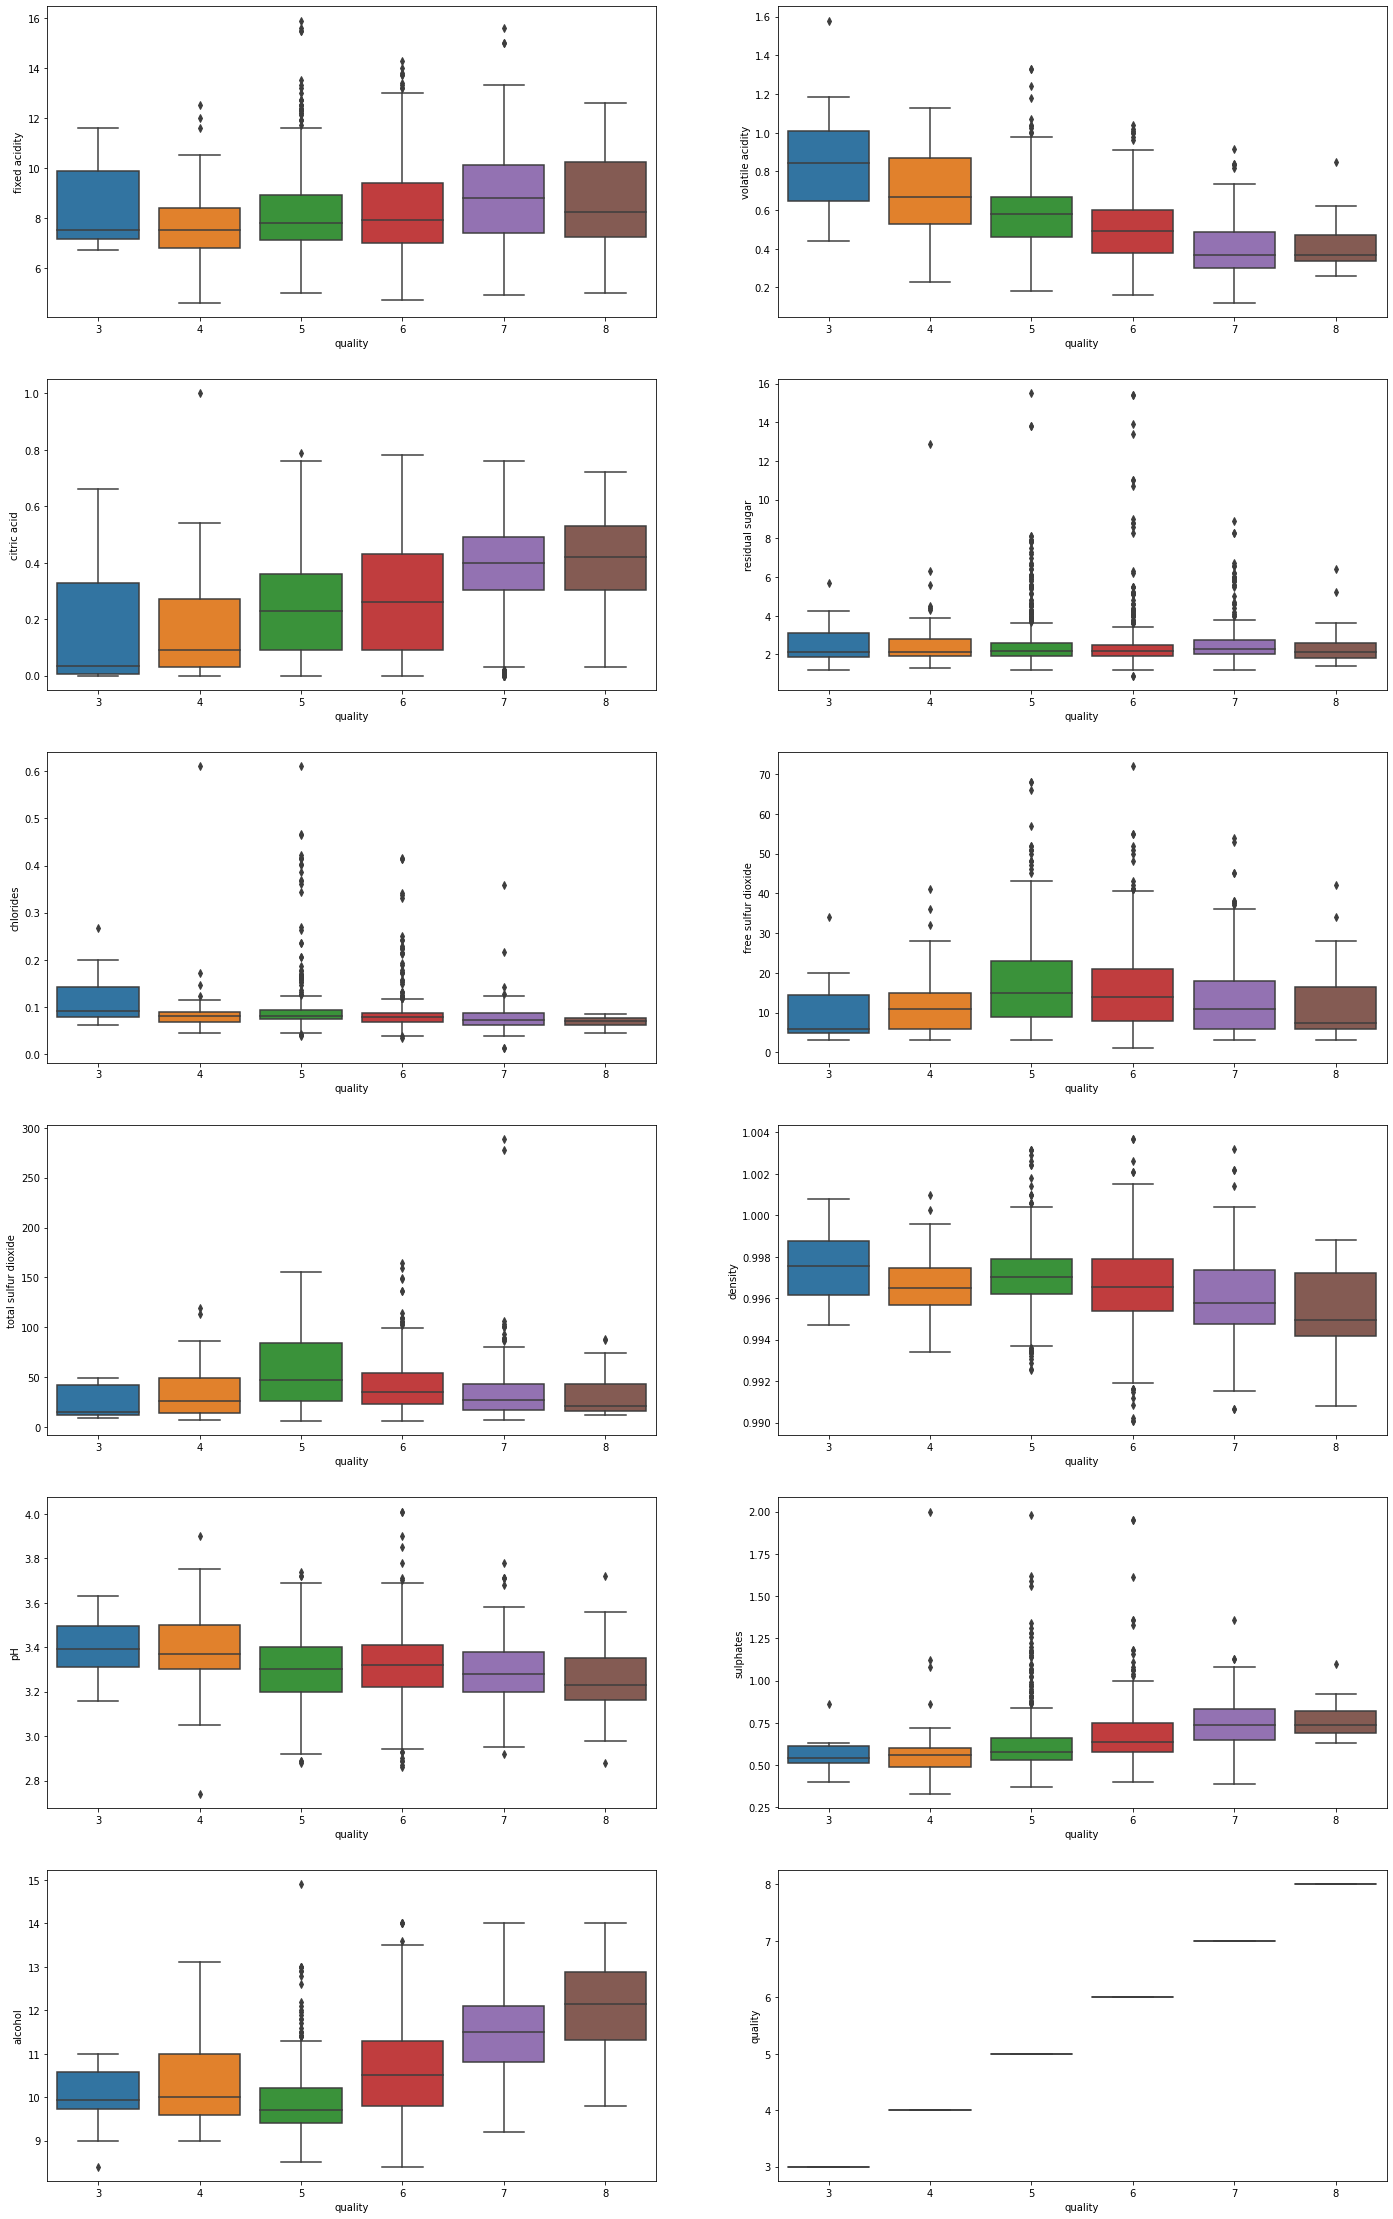

In [15]:


fig, ax1 = plt.subplots(6,2, figsize=(24,40))
k = 0
columns = list(dataset.columns)
for i in range(6):
    for j in range(2):
            sns.boxplot(dataset['quality'], dataset[columns[k]], ax = ax1[i][j])
            k += 1
plt.savefig('foo4.png', bbox_inches='tight')
plt.show()

Вывод:
    При анализе данных нужно будет сначала нормализовать и сбалансиировать данные, проработать выбросы. Уже потом заниматься прогнозированием качества вина. Данных достаточно, чтобы обучить модель. 